<a href="https://colab.research.google.com/github/mitadrubanerjee/MyProjects/blob/main/Implementing_Logistic_Regression_Algorithm_fromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing a Logistic Regression Classifier to predict Wildfires**

In the code below I have implemented a Logistic Regression Algorithm from scrath. I have used the Logistic Regression from sklearn, as a benchmark against my algorithm . 
I have used the Wildfires data set , to predict the outcomes. 

I have developed using Google Collab, so to run it, the data set has to be loaded into the Collab workspace. 

The steps followed have been listed below:

1)Loading the necesssary packages. 

2)Loading the data set.

3)Cleaning the data , converting to arrays to make it fit for the algorithm.

4)Defining the individual functions. 

5)Calling the predict function to run through the Logistic Regression functions.

6)Running confusion matrix and accuracy chekcs to test the accuracy of the algo. 

7)Running the pre-defined Logistic Regression from sklearn to compare against the algoritrthm.

In [ ]:
#Loading the necessary libraries required to run the algorithm:

#Loading pandas to read the csv file and manipulate the data.
import pandas as pd
#Loading numpy to convert the pandas data into arrays. 
import numpy as np
#Loading sklearn to import the Logistic Regression function to benchmark against the created algorithm.
from sklearn import linear_model
#Loading matplotlib to plot the cost function and logistic regression. 
import matplotlib.pyplot as plt
#Loading seaborn to plot the heatmap of the Logistic Predictor
import seaborn as sns


In [ ]:
#Loading Wildfire Data Set; and saving it in the pandas data frame, 'wildfire'. 
wildfire = pd.read_csv("Wild_Fire_DataSet.csv")
#Checking if the pandas data frame has been loaded properly. 
wildfire.head(10)

,yes,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18
5,yes,2008,30,67,0.0,22.71,7.97,6,6,14
6,yes,2013,32,52,0.0,30.98,11.86,7,6,14
7,yes,2009,29,72,0.0,38.66,14.31,8,6,17
8,no,2014,26,89,0.2,39.62,10.76,9,6,15
9,no,2007,28,77,0.0,46.44,13.14,10,6,13


In [ ]:
#As we can see from the loaded data, the column,'yes' has data in terms of 'yes' and 'no'; 
#so its necessary to convert that into 1 & 0.
#The provided data has the first column named as 'yes', so I have maintained that throughout the code.
#Converting the 'yes','no' to 1 and 0; by using a lambda function over the entire column of the data set. 
wildfire['yes'] = wildfire['yes'].map(lambda x: 1 if x == 'yes' else 0) 
#Checking the top 10 values of the updated data set. 
wildfire.head(10)

,yes,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0,2015,28,59,0.0,8.06,3.47,1,6,19
1,0,2010,30,61,1.3,8.17,4.03,2,6,13
2,0,2009,26,83,13.1,8.08,3.59,3,6,22
3,0,2017,25,87,2.5,7.18,2.42,4,6,15
4,0,2014,28,77,0.0,14.98,4.63,5,6,18
5,1,2008,30,67,0.0,22.71,7.97,6,6,14
6,1,2013,32,52,0.0,30.98,11.86,7,6,14
7,1,2009,29,72,0.0,38.66,14.31,8,6,17
8,0,2014,26,89,0.2,39.62,10.76,9,6,15
9,0,2007,28,77,0.0,46.44,13.14,10,6,13


In [ ]:
#Isolating the dependent(target variables) and independent variabales (independent_features) from the data set. 

#In the below code I have isolated the target variable('yes/no') from the features to be used for prediction. 
#I will be storing the features used to make predictions in the X
independent_feature = ['year', 'temp', 'humidity', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']
X = wildfire[independent_feature]
#The isolated data (X), will be used as the features to be used for predicting. 
X
#Isolating the target values and storing them in y. The data in y, will be used as the lables in the prediction algo. 
y = wildfire['yes']

#Printing to check if the data has been partitioned corrctly or not:
print(X)
print(y)

     year  temp  humidity  drought_code  buildup_index  day  month  wind_speed
0    2015    28        59          8.06           3.47    1      6          19
1    2010    30        61          8.17           4.03    2      6          13
2    2009    26        83          8.08           3.59    3      6          22
3    2017    25        87          7.18           2.42    4      6          15
4    2014    28        77         14.98           4.63    5      6          18
..    ...   ...       ...           ...            ...  ...    ...         ...
199  2017    31        67         45.15          17.89   26      9          15
200  2017    29        89          8.74           6.52   27      9          15
201  2009    27        88          8.87           3.71   28      9          30
202  2016    25        56         15.54           6.10   29      9          20
203  2012    24        62         16.72           5.75   30      9          17

[204 rows x 8 columns]
0      0
1      0
2      0
3

In [ ]:
#Checking the shapes of the data set and fixing the shapes:
print("Shape of X:",X.shape)
print("Shape of Y:",y.shape)
#Reshaping the target attribute:
#y=y.values.reshape(y.shape[0],1)
#Reprinting the shapes of data sets:
print("Shape of X:",X.shape)
print("Shape of Y:",y.shape)

Shape of X: (204, 8)
Shape of Y: (204,)
Shape of X: (204, 8)
Shape of Y: (204,)


In [ ]:
#splitting X and y into training and testing sets. 
#The data in X,y will be split using the train_test_split method of the sklearn.model_selection package. 

#As per the request in the assignment, I have split the data in train:test = 0.67:0.33 ratio. 
#In the below code I have selected the test_size as 0.33, for that reason. 

#!pip install sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=0,shuffle=True,stratify=None)

print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

     year  temp  humidity  drought_code  buildup_index  day  month  wind_speed
164  2008    36        53        128.08          46.25   22      8          16
51   2017    33        64         94.81          27.97   14      8          16
185  2016    31        70         25.72           9.58   12      9          14
190  2008    35        43         64.07          27.11   17      9          12
92   2017    30        64         15.38           6.24   24      9          19
..    ...   ...       ...           ...            ...  ...    ...         ...
67   2013    35        70        181.14          37.76   30      8          19
192  2009    29        43         86.71          28.93   19      9          10
117  2015    33        68          9.12           5.09   19      6          16
47   2011    36        54         67.91          22.61   10      8          14
172  2013    35        47        159.81          36.57   30      8          17

[136 rows x 8 columns]
164    1
51     1
185    1
1

**The code upto this point has:**

1)Loaded the data.

2)Isolated the training and tests sets.

3)The data as of now is: X_train, X_test, y_train, y_test 

**Logistic Regression**

Linear Regression provides a model for relationship between magnitude of a target variable against the change in the predictor variable. The goal of Linear Regression is to find the equation that best describes (y) in terms of the attributes (x). Traditionally the equation can be represented as, y=mx+c; where c=intercept, x=input, m=slope of the line (regression co-efficient). At c=0 (no intercept), the equation can be re-written as y=mx.  Thus, the goal of regression is to find a hypothesis that best describes the relation between predictor variables and its associated weights. The Linear Regression equation can be rewritten in terms of the hypothesis. Hypothesis (h) can be represented as a function of the (theta) values and the individual input. 
The Hypothesis can be represented as:  h=θ.X ; The equation represents the θ, which is the weight associated with the attribute. The objective is to find the θ value for which the mean squared error between the predicted values and the actual target values is the least. If any attribute has an associated weight of 0 (θ=0), in that case that particular attribute has no impact on the hypothesis.

The hypothesis might not always predict the target values exactly, the difference between the two is calculated using the Root Mean Square error. This difference is represented using the Cost Function. The final goal is to reduce the cost function so that the difference bewteen the actual and predicted values is as low as possible. We use the gradient descent function to calculate the least possible value of the cost function. The Linear Regression algorithm predicts a specific quantity, but by using a soft threshold (50%) we can convert the equatioon into a Logistic Regression Classfier. Logitic Regression can predict values when convert the target values in terms of 0/1. In the provided data set; the occurences of fire has been represented as either ‘yes’ or ‘no’. I will be converting this value into 0 (for no) and 1 (for yes).  The Logistic Regression Classifier uses a sigmoid function, (it cosolidates the data between intervals of 0 and 1), to formulate a hypothesis. The hypothesis essentially fits the data and gives the probability of occurences between 0 and 1.
The steps to be followed to formulate a Logistic Regression Classifier in Python:
•	Convert all the target values to 0/1. 

•	Formulate the hypothesis using a sigmoid function which returns values between 0 and 1.

•	Create a function to calculate the cost at each step, to understand the difference between the actual and predicted values. 

•	I will be using the Gradient Descent function to update the theta values with respect to the randomly initialized values. The theta values will be updated at each iteration.

•	I will create the function logistic_model, to call each of the functions declared above and return the cost, predicted results, hypothesis and accuracy. 


The following code will now be diverged into 3 parts:

A) User-Defined Logistic Regression Algorithm with its accuracy calculator.

B) Logistic Regression called from sklearn as a benchmark to the User-Defined Algorithm.

C)Comapring the ROC_AUC score of the User Defined Logistic Regression algorithm against the Reference Logistic Regression algorithm.

In [ ]:
#A)1)
#Below is the code for User Defined Logistic Regression Function:

#The below code is divided into 4 functions: 

#1)hypothesis-To calculate the hypothesis.
#2)cost-To calculte the cost function of the hypothesis. 
#3)gradient descent-To calculate the minimum value of the cost function, using the gradient descent function. 
#4)logistic_model-To formulate the logistic regression algorithm. 


#The function 'hypothesis', determines the hyposthesis over the data set. 

#This function finds out the relation-> hypothesis = (theta)*(X); 
# X->Input value; hypothesis->Predicted outcome; theta-> weight associated with the variable (X)
#The theta value has been initialized to a value close to 0, to avoid getting a 0 value from start. 

def hypothesis(X, theta):
    #Calcultaing the dot product of the theta and the Input feature values. 
    z = np.dot(theta, X.T)
    #The below code is used to return the sigmoid function to predict the results. 
    #The 0.0001 value has been deducted to avoid the scenario, where (log 1 might become zero in the cost function)
    return 1/(1+np.exp(-(z))) - 0.0001

#This function calculates the cost function of the hypothesis. 
#The function makes a call to the 'hypothesis' function and calculates its cost on the returned value. 

def cost_function(X, y, theta):
    y1 = hypothesis(X, theta)
    #The below code returns the cost function (J) to the calling function. 
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

#This function calculates the gradient descent of the cost function.
#The function returns the cost and the updated theta values. 
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost_function(X, y, theta)] 
    #For loop to update the theta values. 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost_function(X, y, theta))
    return J, theta

#This function fits the data in the logistic regression model. 

def logistic_model(X, y, theta, alpha, epochs):
    #The below code calls the gradient descent function.
    L, th = gradient_descent(X, y, theta, alpha, epochs) 
    #The below code calls the hypothesis function to formulate the hypothesis. 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    #Calculating the accuracy of the classifier
    accuracy = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    #Returning the cost, accuracy, hypothesis and predicted values. 
    return L, accuracy, h, y

In [ ]:
#A)2)
#Training the logistic regression model using the training data sets(X_train, Y_train):
#Initializing the theta values to a value close to 0. 
#theta = [0.00005]*len(X.columns)
theta = 0.00005
#Storing the values being returned by the logistic_model function 
#Setting the learning rate at=0.00001; iterations at 30000, as its the best setting to get the optimum results. 
cost_logit, accuracy_logit, hyp, result= logistic_model(X_train, Y_train, theta, 0.00001, 30000)

In [ ]:
#A)3)
#Testing the logistic regression model, using the test data set(X_test, Y_test)
theta = [0.0005]*len(X.columns)
#Calling the logistic regression model and storing the returned values. 
cost_logit, accuracy_logit, hyp, result= logistic_model(X_test, Y_test, theta, 0.0001, 30000)
#Printing the accuracy of the classifier. 
Accuracy_Score_Logit=accuracy_score(Y_test, result)
print("The accuracy of the Logistic Regression Classifier is",(Accuracy_Score_Logit*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log


The accuracy of the Logistic Regression Classifier is 100.0


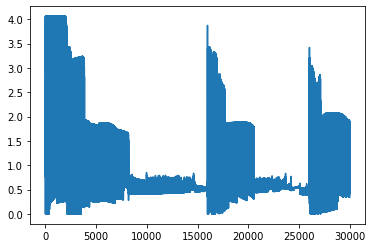

In [ ]:
#A)4)Plotting the cost of the algorithm
plt.plot(cost_logit)

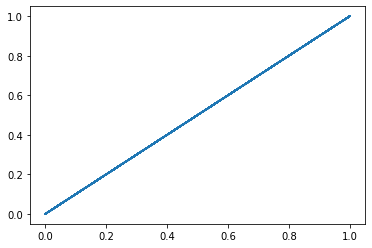

In [ ]:
#A)5)Plotting the predicted values against the test values
plt.plot(Y_test,result)

In [ ]:
#A)6)
#Printing the confusion matrix and classification report to evaluate the user defined classifier:
#Importing the confusion matrix and classification report from sklearn.metrics to evaluate the results. 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Printing the results of the evaluating the classfier.
cm_user=confusion_matrix(result,Y_test)
print(confusion_matrix(result,Y_test))
print(classification_report(result,Y_test))

[[30  0]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        38

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



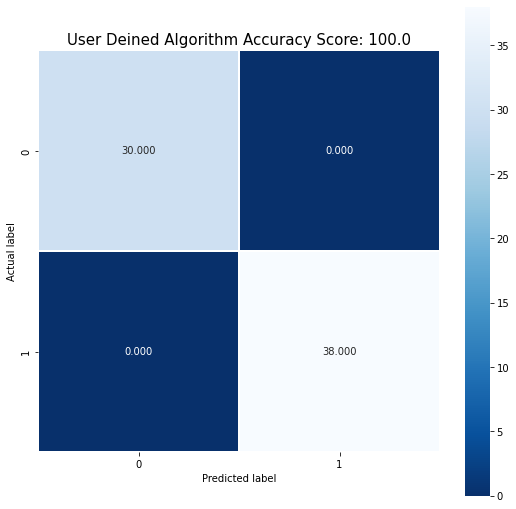

In [ ]:
#A)7)
#The below code is to create a heat map of the confusion matrix of the obtained results, detailing the (Actual/Predicted Scores)
#I have used seaborn to plot the matrix. 
plt.figure(figsize=(9,9))
sns.heatmap(cm_user, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'User Deined Algorithm Accuracy Score: {0}'.format(Accuracy_Score_Logit*100)
plt.title(all_sample_title, size = 15);

In the below code, I have imported LogisticRegression from sklearn, to benchmark against the user defined LogisticRegression Classifier algorithm. 

In [ ]:
#B)1) 

#Below is the code for the reference implementation of Logistic Regression Classifier as imported from  sklearn. 
#Importing the LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
#Importing accuracy_score from sklearn to identify the accuracy of the Logistic Regression Model. 
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
logisticRegr = LogisticRegression()
#Fitting the Regression model with the training values. 
logisticRegr.fit(X_train, Y_train)
#Predicting the outcome using the test data. 
logit_pred = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, Y_test)
Accuracy_Score_Logistic=accuracy_score(Y_test, logit_pred)
print("The accuracy percentage of the Classifier is:",Accuracy_Score_Logistic*100,"%")
#Evaluating the classifier using the confusion matrix
cm = metrics.confusion_matrix(Y_test, logit_pred)
#The predicted outcome is stored in 'logit_pred', the score of accuracy is stored in'Accuracy_Score_Logistic';
#Confusion matrix is stored in'cm'. 

The accuracy percentage of the Classifier is: 83.82352941176471 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Plotting the confusion matrix and creating a heat map, to visualize it using the seaborn. 

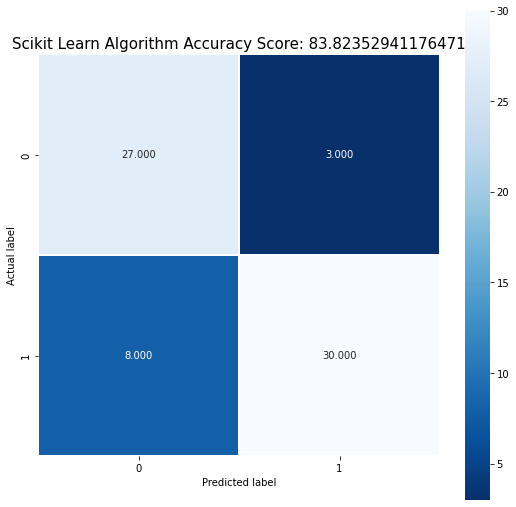

In [ ]:
#B)2)
#The below code is to create a heat map of the confusion matrix of the obtained results, detailing the (Actual/Predicted Scores)
#I have used seaborn to plot the matrix. 
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Scikit Learn Algorithm Accuracy Score: {0}'.format(Accuracy_Score_Logistic*100)
plt.title(all_sample_title, size = 15);

In [ ]:
#C) 
#Comparing the user defined and benchmarking classifier using ROC curves:
#Importing the roc_auc_score method from sklearn.metrics. 
from sklearn.metrics import roc_curve, roc_auc_score
#ROC_AUC score of the user defined Logistic Regression Classifier:
r_auc_result=roc_auc_score(Y_test,result)
#ROC_AUC score of the benchmarking(reference) Logistic Regression Classifier:
r_auc_logit=roc_auc_score(Y_test,logit_pred)

print("The ROC_AUC score of the User Defined Logistic Regression Classifier is:", r_auc_result)
print("The ROC_AUC score of the Reference Logistic Regression (Benchmarking) Classifier is:",r_auc_logit)


The ROC_AUC score of the User Defined Logistic Regression Classifier is: 1.0
The ROC_AUC score of the Reference Logistic Regression (Benchmarking) Classifier is: 0.8447368421052632


I started developing the classifier with a learning rate of 0.01, theta value of 0 and with iterations of 20,000. I tried to tune the classifier further, achieving the best possible results with the following specifications: learning rate(alpha)=0.0001, iterations=30000 and a theta value of {[0.00005]*len(X.columns)}, but not 0. I realized that if I added a very low learning rate and increased the number of iterations, it increased the computational time, but vastly increased the accuracy of the algorithm. These changes to the parameters increased the accuracy of the algorithm significantly, taking it from 72% to 100%. This proves a direct relationship between the learning rate and the accuracy of the algorithm. 